<i>STATUS: Draft</i>

<hr/>

In [2]:
import numpy as np
import sympy as sp
from IPython.display import HTML, IFrame
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools
from IPython.display import Image
import math



# function to print latex
def renderListToLatex(e):
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$$" + sp.latex(e[i]) + "$$")
    
    return(HTML("".join(latex_rendering[0:])))

### DCB Curves (4)
#### Why classical calculus struggles with Archimedes' parabolic area 

<hr/>

<b>Aim</b>: To provide an overview of Archimedes' formula to calculate a parabolic area.

<hr/>

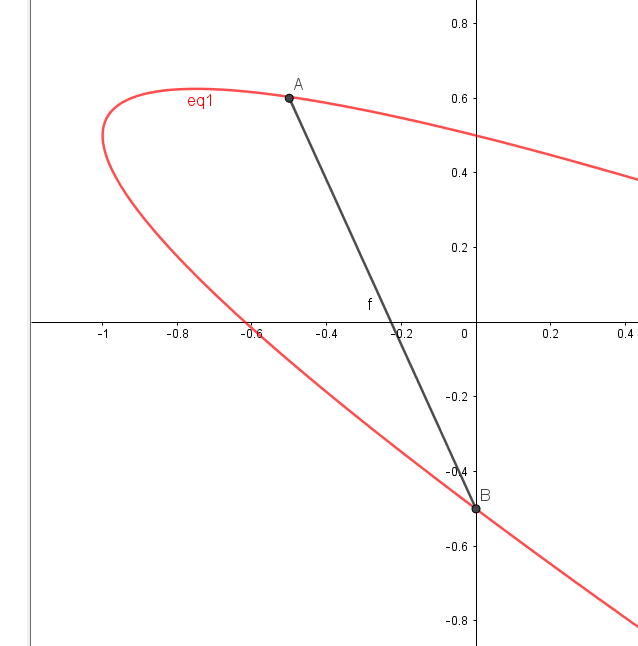

In [6]:
Image("./Images/DCB4_1.PNG", width = 500)

<b>Observe</b>: Archimedes formula to calculate a parabolic area (area under a parabolic curve, shown above) is a famous theorem of archimedes, the <b>Parabolic Area Formula</b> demonstrating that the parabolic area is both definable and computable.

<b>Observe</b>: The parabolic area is different to areas calculated in relation to circles and hyperbolas, which which need to be approached using circumscribed polygons, rectangles. 

<b>Observe</b>: Because of the importance of area in relation to the parabola, Newton viewed the integration for functions as a generalisation of the parabolic area and referred to these polynomial functions as generalised parabolas

<b>Reference</b>: This is related to Famous Math Problem 6 in NJW Insights into mathematics. 

<b>Observe</b>: It is difficult to prove this formula using standard calculus.

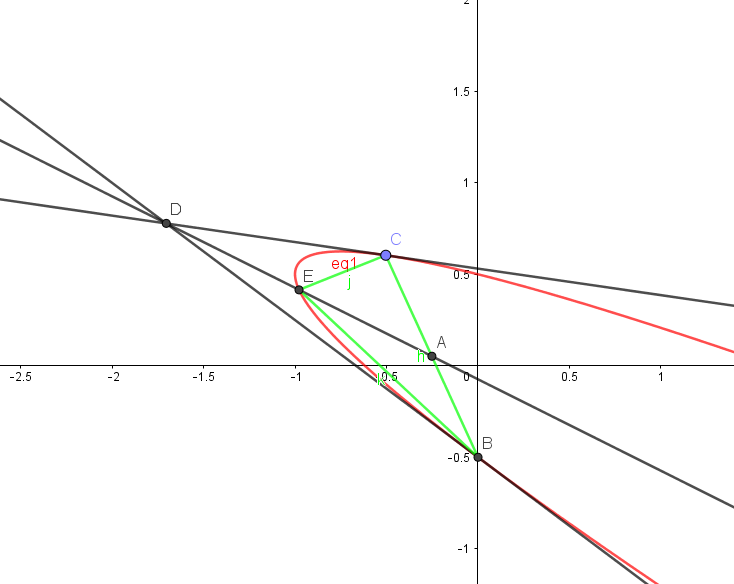

In [8]:
Image("./Images/DCB5_1.PNG", width=500)

<b>Theorem (Arcimedes)</b>: The area of a parabolic arc subtended by the chord $AB$ is $4/3$ times the area of the maximum inscribed triangle $\overline{EBC}$. Equivalently, it is $2/3$ times the area of the tangential triangle $\overline{CBD}$